In [13]:
#ライブラリの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#pandas-datareaderのインストール
!pip install pandas_datareader
#ライブラリの読み込み
import pandas_datareader.data as dr
#stooqというデータ提供元からAPPLEの株価を取得する
stock=dr.DataReader('AAPL',"stooq")
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-21,133.420,137.060,133.32,135.87,81000488
2022-06-17,130.065,133.079,129.81,131.56,134520290
2022-06-16,132.080,132.390,129.04,130.06,107961508
2022-06-15,134.290,137.340,132.16,135.43,91532972
2022-06-14,133.130,133.890,131.48,132.76,84784326


In [14]:
#翌日のHigh(高値)を「Next_High」として追加
stock['Next_High']=stock['High'].shift(1)
stock.head()

,Open,High,Low,Close,Volume,Next_High
Date,,,,,,
2022-06-17,130.065,133.079,129.81,131.56,134520290,NaN
2022-06-16,132.080,132.390,129.04,130.06,107961508,133.079
2022-06-15,134.290,137.340,132.16,135.43,91532972,132.390
2022-06-14,133.130,133.890,131.48,132.76,84784326,137.340
2022-06-13,132.870,135.200,131.44,131.88,122207099,133.890


In [15]:
stock.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Next_High    1
dtype: int64

In [16]:
stock=stock.dropna()
stock.shape

(1255, 6)

In [17]:
#説明変数の列
data_columns=['Open','High','Low','Close','Volume']
#検証データ数
test_rows=500

#stockを目的変数(target)と説明変数(data)に分ける
target=stock['Next_High']
data=stock[data_columns]

#学習データと検証データに分割
target_train=target[test_rows:]
target_test=target[:test_rows]
data_train=data[test_rows:]
data_test=data[:test_rows]

In [18]:
print(target.shape)
print(data.shape)
print(data_train.shape)
print(target_train.shape)
print(data_test.shape)
print(target_test.shape)

(1255,)
(1255, 5)
(755, 5)
(755,)
(500, 5)
(500,)


In [19]:
#ライブラリの読み込み
from sklearn.linear_model import LinearRegression
#モデルの初期化
model=LinearRegression()
#学習の実施
model.fit(data_train, target_train)

LinearRegression()

In [20]:
target_predict=model.predict(data_test)

<AxesSubplot:xlabel='Date'>

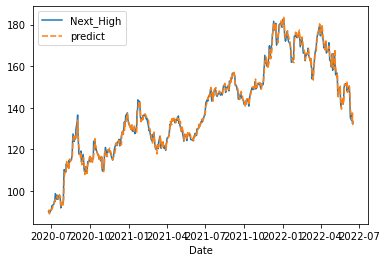

In [21]:
#検証データの目的変数でDadaFrameを作成
result=pd.DataFrame(target_test)
#予測結果を列「predict」としてDataFrameに追加
result['predict']=target_predict
#グラフを描画
sns.lineplot(data=result)

<AxesSubplot:xlabel='Date'>

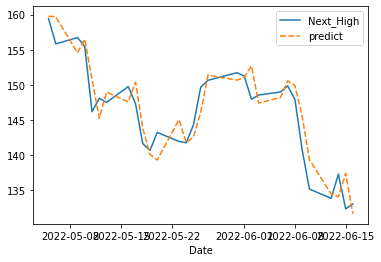

In [22]:
sns.lineplot(data=result[:30])

In [23]:
#平均二乗誤差(MSE)によるモデルの評価
from sklearn.metrics import mean_squared_error
mean_squared_error(target_test, target_predict)

3.740629682918844

4.180856231639134

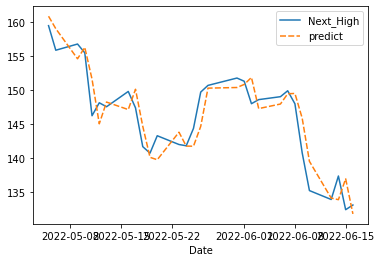

In [24]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(data_train,target_train)

target_predict=model.predict(data_test)
result=pd.DataFrame(target_test)
result['predict']=target_predict

sns.lineplot(data=result[:30])

mean_squared_error(target_test, target_predict)

C:\Users\camjt\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25604e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


3.741047636082497

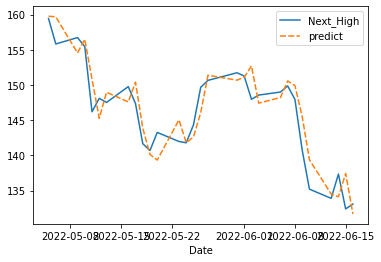

In [25]:
from sklearn.linear_model import Ridge
model=Ridge(alpha=1.0)
model.fit(data_train,target_train)

target_predict=model.predict(data_test)
result=pd.DataFrame(target_test)
result['predict']=target_predict

sns.lineplot(data=result[:30])

mean_squared_error(target_test, target_predict)

4.30683083269847

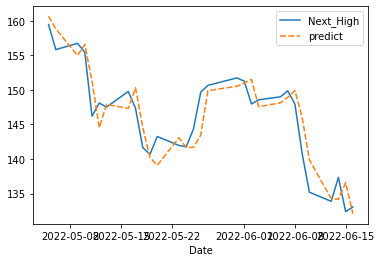

In [26]:
from sklearn.linear_model import ElasticNet
model=ElasticNet()
model.fit(data_train,target_train)

target_predict=model.predict(data_test)
result=pd.DataFrame(target_test)
result['predict']=target_predict

sns.lineplot(data=result[:30])

mean_squared_error(target_test, target_predict)